Sebastian Yepes Acevedo

Cc:1007448816

Demostración:

1) Partiendo de $$J(\Theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\Theta(x^{(i)}-y^{(i)})^2$$

con $h_\Theta(x^{(i)})$ como la predicción, podemos escribir en notación vectorial definiendo $h=X\Theta\in R^{m\times 1}$, tnemos entonces:

$$J(\Theta)=\frac{1}{2m}(X\Theta-y)^T(X\Theta-y)$$

2. Expandiendo la forma matricial por bilinealidad:
$$J(\Theta)
= \frac{1}{2m} (\mathbf{X}\Theta - \mathbf{y})^{T}(\mathbf{X}\Theta - \mathbf{y}) \\[6pt]
= \frac{1}{2m} \left[
(\mathbf{X}\Theta)^{T}(\mathbf{X}\Theta)
- (\mathbf{X}\Theta)^{T}\mathbf{y}
- \mathbf{y}^{T}(\mathbf{X}\Theta)
+ \mathbf{y}^{T}\mathbf{y}
\right] \\[6pt]
= \frac{1}{2m} \left[
\Theta^{T}\mathbf{X}^{T}\mathbf{X}\Theta
- \Theta^{T}\mathbf{X}^{T}\mathbf{y}
- \mathbf{y}^{T}\mathbf{X}\Theta
+ \mathbf{y}^{T}\mathbf{y}
\right].
$$

Observamos que
$
(\mathbf{X}\Theta)^{T}\mathbf{y} = \Theta^{T}\mathbf{X}^{T}\mathbf{y}
\quad \text{y} \quad
\mathbf{y}^{T}(\mathbf{X}\Theta) = \left[(\mathbf{X}\Theta)^{T}\mathbf{y}\right]^{T} = \Theta^{T}\mathbf{X}^{T}\mathbf{y},
$
por lo tanto, ambos términos se combinan en:
$
-2\,\mathbf{y}^{T}\mathbf{X}\Theta.
$

Así, obtenemos finalmente:
$$
J(\Theta) = \frac{1}{2m}
\left(
\Theta^{T}\mathbf{X}^{T}\mathbf{X}\Theta
- 2\,\mathbf{y}^{T}\mathbf{X}\Theta
+ \mathbf{y}^{T}\mathbf{y}
\right).
$$


3) Partiendo de:
$$
J(\Theta) = \frac{1}{2m}
\left(
\Theta^{T}\mathbf{X}^{T}\mathbf{X}\Theta
- 2\,\mathbf{y}^{T}\mathbf{X}\Theta
+ \mathbf{y}^{T}\mathbf{y}
\right).
$$

Usandos identidades de derivadas matriciales para calcular el gradiente respecto a $\Theta$.

Sea $\mathbf{A} = \mathbf{X}^{T}\mathbf{X}$, que es una matriz simétrica.  
Entonces:

$$
\nabla_{\Theta}(\Theta^{T}\mathbf{A}\Theta) = 2\mathbf{A}\Theta = 2\mathbf{X}^{T}\mathbf{X}\Theta.
$$

Para el segundo término:

$$
\nabla_{\Theta}(-2\,\mathbf{y}^{T}\mathbf{X}\Theta) = -2\,\mathbf{X}^{T}\mathbf{y},
$$
ya que se cumple la identidad
$$
\nabla_{\Theta}(\mathbf{b}^{T}\Theta) = \mathbf{b}.
$$

El término $\mathbf{y}^{T}\mathbf{y}$ no depende de $\Theta$, por lo tanto:
$$
\nabla_{\Theta}(\mathbf{y}^{T}\mathbf{y}) = 0.
$$

Combinando todo:

$$
\nabla_{\Theta} J(\Theta)
= \frac{1}{2m}\left( 2\mathbf{X}^{T}\mathbf{X}\Theta - 2\mathbf{X}^{T}\mathbf{y} \right)
= \frac{1}{m}\left( \mathbf{X}^{T}\mathbf{X}\Theta - \mathbf{X}^{T}\mathbf{y} \right).
$$

Obtenemos la forma habitual del gradiente:

$$
\nabla_{\Theta} J = \frac{1}{m}\left( \mathbf{X}^{T}\mathbf{X}\Theta - \mathbf{X}^{T}\mathbf{y} \right).
$$



4) De esta manera tenemos lo siguiente para encontrar el mínimo:

$$\frac{1}{m}(X^TX\Theta-X^Ty)=0$$

$$X^TX\Theta = X^Ty$$

Si $X^TX$ es invertible, despejamos y obtenemos:

$$\Theta = (X^TX)^{-1}X^Ty$$


# Parte computacional

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1)

Aplicamos la ecuación normal a los datos del DataSet pasado.

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")

In [25]:
df_num = df.select_dtypes(include=[np.number]).dropna()


y = df_num["median_house_value"].values.reshape(-1, 1)


X = df_num.drop(columns=["median_house_value"]).values


X_b = np.hstack([np.ones((X.shape[0], 1)), X])


theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

col_names = ["Intercept"] + list(df_num.drop(columns=["median_house_value"]).columns)
theta_df = pd.DataFrame(theta_best, index=col_names, columns=["Coeficiente"])
print(theta_df)

y_pred = X_b.dot(theta_best)
mse = np.mean((y_pred - y)**2)
print(f"\nError cuadrático medio (MSE): {mse:.2f}")

                     Coeficiente
Intercept          -3.585396e+06
longitude          -4.273012e+04
latitude           -4.250974e+04
housing_median_age  1.157900e+03
total_rooms        -8.249725e+00
total_bedrooms      1.138207e+02
population         -3.838558e+01
households          4.770135e+01
median_income       4.029752e+04

Error cuadrático medio (MSE): 4838057779.64


Con el fin de ver qué tan adecuada es la predicción obtenida por este método, compararemos con la regresión lineal de sklearn y evaluaremos el score.

In [26]:
model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print("R²:", r2_score(y, y_pred))
print("MSE con sklearn:", mse_sklearn)
print("Coeficientes sklearn:", [model.intercept_] + list(model.coef_[0]))


R²: 0.6369116857335633
MSE con sklearn: 4838057779.640016
Coeficientes sklearn: [array([-3585395.74789306]), np.float64(-42730.120453588985), np.float64(-42509.73694183201), np.float64(1157.9003071519155), np.float64(-8.249725069152191), np.float64(113.82070712792483), np.float64(-38.38557804964876), np.float64(47.70135133102758), np.float64(40297.52171480644)]


Obtenemos un error cuadrático medio igual al que obtuvimos al usar la ecuación normal. Con ello, también podemos notar un score de que el modelo es util para analizar estos datos.

# 2)

In [27]:
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

Con el fin de observar cómo se distribuyen mejor los datos y entender qué método puede ser mejor en diferentes situaciones, comenzaremos realizando una regresión lineal.

In [36]:
X = df[["rm"]]
y = df["mean_"]

model_simple = LinearRegression()
model_simple.fit(X, y)

y_pred = model_simple.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Coeficiente (pendiente): {model_simple.coef_[0]:.4f}")
print(f"Intercepto: {model_simple.intercept_:.4f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")



Coeficiente (pendiente): 9.1021
Intercepto: -34.6706
MSE: 43.60
R²: 0.484


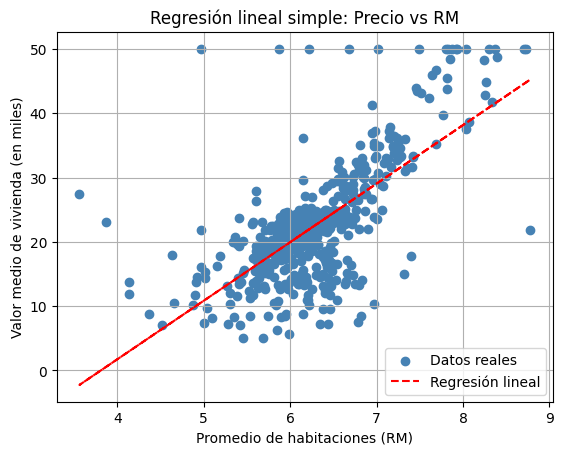

In [38]:
plt.scatter(X, y, color="steelblue", label="Datos reales")
plt.plot(X, y_pred, "r--", label="Regresión lineal")
plt.xlabel("Promedio de habitaciones (RM)")
plt.ylabel("Valor medio de vivienda (en miles)")
plt.title("Regresión lineal simple: Precio vs RM")
plt.grid()
plt.legend()
plt.show()

Vemos que los datos no siguen la predicción de una manera muy dispersa, además de que el score obtenido nos da como resultado un ajuste bastante malo.

Realizamos ahora sí, la regresión multivariada. Tomamos la versión cruda de los datos y nombramos las columnas para predecir el precio.

In [30]:
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df_full = pd.DataFrame(data, columns=columns)
df_full["PRICE"] = target

X = df_full.drop(columns=["PRICE"])
y = df_full["PRICE"]

model_multi = LinearRegression()
model_multi.fit(X, y)

y_pred_multi = model_multi.predict(X)
mse_multi = mean_squared_error(y, y_pred_multi)
r2_multi = r2_score(y, y_pred_multi)

print("\n--- Modelo multivariado ---")
print(f"MSE: {mse_multi:.2f}")
print(f"R²: {r2_multi:.3f}")

coef_df = pd.DataFrame({
    "Variable": ["Intercept"] + list(X.columns),
    "Coeficiente": [model_multi.intercept_] + list(model_multi.coef_)
})
print(coef_df)


--- Modelo multivariado ---
MSE: 21.89
R²: 0.741
     Variable  Coeficiente
0   Intercept    36.459488
1        CRIM    -0.108011
2          ZN     0.046420
3       INDUS     0.020559
4        CHAS     2.686734
5         NOX   -17.766611
6          RM     3.809865
7         AGE     0.000692
8         DIS    -1.475567
9         RAD     0.306049
10        TAX    -0.012335
11    PTRATIO    -0.952747
12          B     0.009312
13      LSTAT    -0.524758


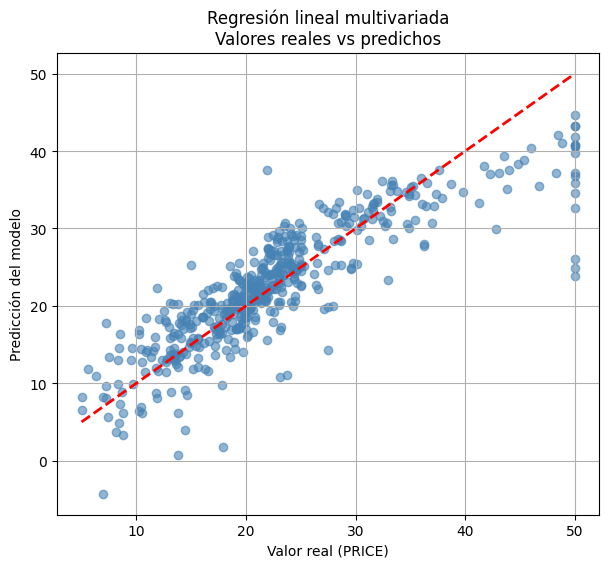

In [18]:
plt.figure(figsize=(7,6))
plt.scatter(y, y_pred_multi, color="steelblue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.xlabel("Valor real (PRICE)")
plt.ylabel("Predicción del modelo")
plt.title("Regresión lineal multivariada\nValores reales vs predichos")
plt.grid(True)
plt.show()


Podemos observar en comparación, un ajuste bastante bueno y decente en comparación con el obtenido en una regresión lineal. Además el score también retifica lo que se puede ver a simple vista en el grafico, lo cual nos muestra que el modelado con la regresión para estos datos es mucho mejor que una regresión lineal.